# Crop the original uncloaked images and use them as test and train datasets

In [ ]:
%cd /content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder

[Errno 2] No such file or directory: '/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder'
/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install and import necessary packages

In [ ]:
!pip install mtcnn
import tensorflow as tf
import numpy as np
from PIL import Image
import mtcnn
from matplotlib import pyplot

     |████████████████████████████████| 2.3 MB 8.6 MB/s 


## Set up the detector and parameters

In [ ]:
import os
detector = mtcnn.MTCNN()


[26296]
0
{'box': [97, 65, 152, 173], 'confidence': 0.9999352693557739, 'keypoints': {'left_eye': (129, 141), 'right_eye': (191, 118), 'nose': (171, 171), 'mouth_left': (160, 205), 'mouth_right': (215, 183)}}
(224, 224)


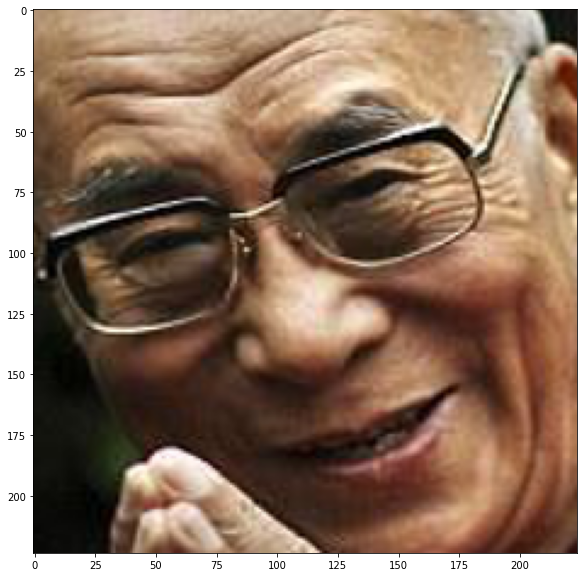

In [ ]:
test_im = Image.open("/content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets/n000001/0433_01.jpg")
tr = detector.detect_faces(np.asarray(test_im))
areas = []
largest_face = max(tr, key=lambda x:x['box'][2] * x['box'][3])
for r in tr:
  area = r['box'][2] * r['box'][3]
  areas.append(area)
print(areas)
print(np.argmax(areas))
print(largest_face)
#left coordinate of the bounding box
left = largest_face['box'][0]
#upper coordinate of the box
upper = largest_face['box'][1]
#right coordinate of the box
right = left + largest_face['box'][2]
#lower coordinate of the box
lower = upper + largest_face['box'][3]
img_cropped = test_im.crop(box=(left,upper,right,lower))
img_resized = img_cropped.resize(size=(224,224))
print(img_resized.size)
pyplot.figure(figsize=(10,10))
pyplot.imshow(img_resized)


## Enumerate every image inside the folder and crop it

In [ ]:
def enum_files_and_crop(root, dest_root_dir, files):
  print("Current directory working on: {dir}".format(dir=root))
  dest_folder_name = os.path.join(dest_root_dir, root.split('/')[-1])
  print(dest_folder_name)
  #make the destination folder if it does not exist
  if os.path.isdir(dest_folder_name) == False:
    os.mkdir(dest_folder_name)
  #enumerate each image inside the folder
  #if the destination directory is not empty skip it
  if os.listdir(dest_folder_name): 
    print("skipping directory {dir}".format(dir=root))
    return
  for file in files:
    img_path = os.path.join(root, file)
    img_save_path = os.path.join(dest_folder_name, file)
    #print(img_save_path)
    img = Image.open(img_path)
    result = detector.detect_faces(np.asarray(img))
    if result == []: #no face detected
      print("No face detected!")
      print("The path is {path}".format(path=img_path))
      continue
    #find the result that has the largest face
    largest_face = max(result, key=lambda x:x['box'][2] * x['box'][3])
    #set up crop coordinates
    #left coordinate of the bounding box
    left = largest_face['box'][0]
    #upper coordinate of the box
    upper = largest_face['box'][1]
    #right coordinate of the box
    right = left + largest_face['box'][2]
    #lower coordinate of the box
    lower = upper + largest_face['box'][3]
    img_cropped = img.crop(box=(left,upper,right,lower))
    #save the cropped image to the destination folder
    img_cropped.save(img_save_path)

def crop_face(root_dir, dest_dir, mode):
  #if destination root directory does not exist make one
  if os.path.isdir(dest_dir) == False:
    os.mkdir(dest_dir)
  for root, subdirs, files in os.walk(root_dir):
    #if the root dir does not contain "cloaked" and it's not ".ipynb_checkpoint"
    if mode == "test_original":
      print(root)
      if len(subdirs) == 0: #the image folders
        if 'ipynb' not in root:
          enum_files_and_crop(root, dest_dir, files)
    #crop high cloaked test images
    elif mode == "test_high":
      #only look at folders if "cloaked_high_test" is in the folder name
      if "cloaked_high_test" in root:
        if len(subdirs) == 0: #the image folders
          enum_files_and_crop(root, dest_dir, files)
    #crop mid cloaked test images
    elif mode == "test_mid":
      #only look at folders if "cloaked_mid_test" is in the folder name
      if "cloaked_mid_test" in root:
        if len(subdirs) == 0: #the image folders
          enum_files_and_crop(root, dest_dir, files)
    #crop low cloaked test images
    elif mode == "test_low":
      #only look at folders if "cloaked_low_test" is in the folder name
      if "cloaked_low_test" in root:
        if len(subdirs) == 0: #the image folders
          enum_files_and_crop(root, dest_dir, files)
    #crop high cloaked train images
    elif mode == "train_high":
      #only look at folders if "cloaked_high" is in the folder name
      if "cloaked_high" in root and "test" not in root:
        if len(subdirs) == 0: #the image folders
          enum_files_and_crop(root, dest_dir, files)
    #crop mid cloaked train images
    elif mode == "train_mid":
      #only look at folders if "cloaked_mid" is in the folder name
      if "cloaked_mid" in root and "test" not in root:
        if len(subdirs) == 0: #the image folders
          enum_files_and_crop(root, dest_dir, files)
    #crop low cloaked train images
    elif mode == "train_low":
      #only look at folders if "cloaked_low" is in the folder name
      if "cloaked_low" in root and "test" not in root:
        if len(subdirs) == 0: #the image folders
          enum_files_and_crop(root, dest_dir, files)
    #unsupported modes
    else:
      print("Unsupported mode {cmd}.".format(cmd=mode))
      print("Usage: test_original, test_high, test_mid, test_low, train_high, train_mid, train_low")
      return




In [ ]:
#crop the test images, which are the original clean version
dest_folder = "/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_original_unseen_cropped"
root_dir = "/content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets"
crop_face(root_dir,dest_folder, mode="test_original")

/content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets
/content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets/n000001
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets/n000001
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_original_unseen_cropped/n000001
/content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets/n000029
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets/n000029
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_original_unseen_cropped/n000029
/content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets/n000078
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/Uncloaked_Test_Sets/n000078
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_original_unseen_cropped/n000078
/content/drive/Shareddrives/CS6220_FinalProj

In [ ]:
#crop the high cloaked train images
dest_folder = "/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/train_high_cloaked_cropped"
root_dir = "/content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset"
crop_face(root_dir, dest_folder, mode="train_high")

In [ ]:
#crop the mid cloaked train images
dest_folder = "/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/train_mid_cloaked_cropped"
root_dir = "/content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset"
crop_face(root_dir, dest_folder, mode="train_mid")

In [ ]:
#crop the high cloaked test images
dest_folder = "/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_high_cloaked_cropped"
root_dir = "/content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset"
crop_face(root_dir, dest_folder, mode="test_high")

In [ ]:
#crop the mid cloaked test images
dest_folder = "/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_mid_cloaked_cropped"
root_dir = "/content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset"
crop_face(root_dir, dest_folder, mode="test_mid")

In [ ]:
#crop the low cloaked train images
dest_folder = "/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/train_low_cloaked_cropped"
root_dir = "/content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset"
crop_face(root_dir, dest_folder, mode="train_low")

Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000029_cloaked_low
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/train_low_cloaked_cropped/n000029_cloaked_low
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000106_cloaked_low
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/train_low_cloaked_cropped/n000106_cloaked_low
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000001_cloaked_low
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/train_low_cloaked_cropped/n000001_cloaked_low
No face detected!
The path is /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000001_cloaked_low/0097_09_cloaked.jpeg
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000129_cloaked_low
/content/drive/Shareddrives/CS6220_FinalProje

In [ ]:
#crop the low cloaked test images
dest_folder = "/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_low_cloaked_cropped"
root_dir = "/content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset"
crop_face(root_dir, dest_folder, mode="test_low")

Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000480_cloaked_low_test
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_low_cloaked_cropped/n000480_cloaked_low_test
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000736_cloaked_low_test
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_low_cloaked_cropped/n000736_cloaked_low_test
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000452_cloaked_low_test
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_low_cloaked_cropped/n000452_cloaked_low_test
Current directory working on: /content/drive/Shareddrives/CS6220_FinalProject/cs6220_dataset/n000363_cloaked_low_test
/content/drive/Shareddrives/CS6220_FinalProject/tensorflow_experiment_folder/test_low_cloaked_cropped/n000363_cloaked_low_test
Current directory wo